# SpecOneD Tutorital 3
## Working with two SpecOneD objects

We begin the tutorial by loading the modules and two spectra.

In [1]:
from astrotools.speconed import speconed as sod
import numpy as np

The two spectra are a quasar spectrum and a quasar template, which we will use for our examples below. Both are included in the 'examples/data/' folder.

In [2]:
specA = sod.SpecOneD() 
specA.read_from_fits('data/J0341+1720.fits')
from astrotools.speconed.speconed import datadir
data = np.genfromtxt('data/vandenberk2001.dat')
specB = sod.SpecOneD(dispersion=data[:,0],flux=data[:,1]*1e-16, flux_err =data[:,2]*1e-16,unit='f_lam')

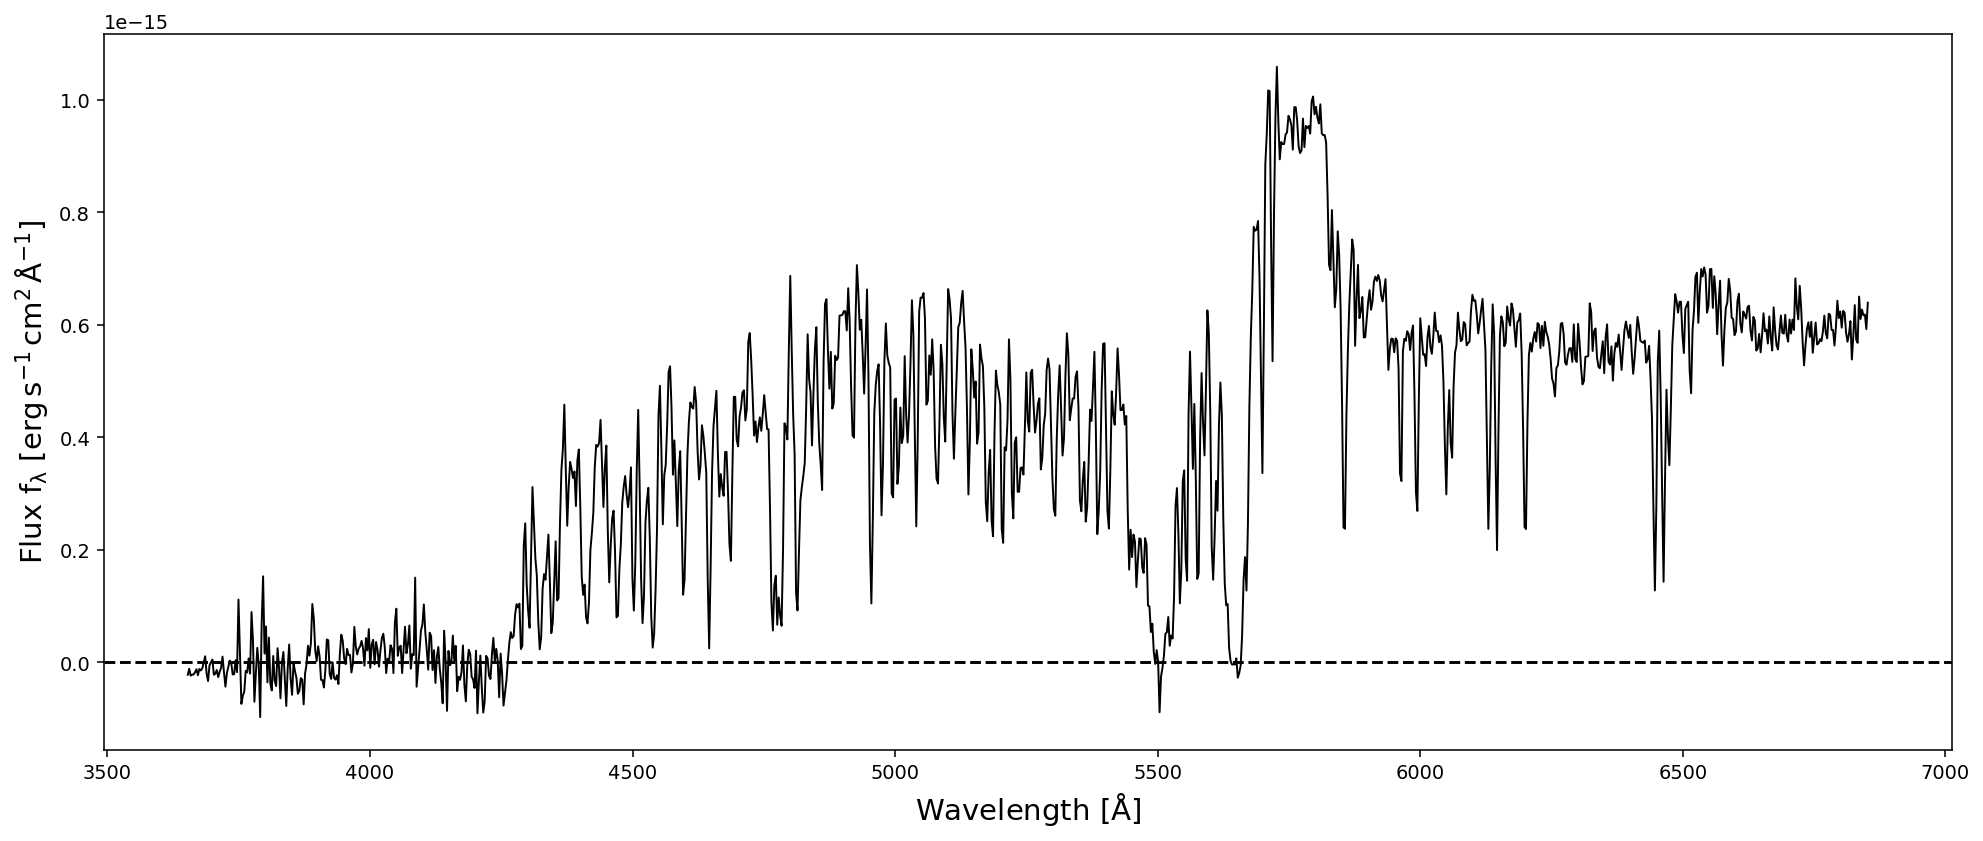

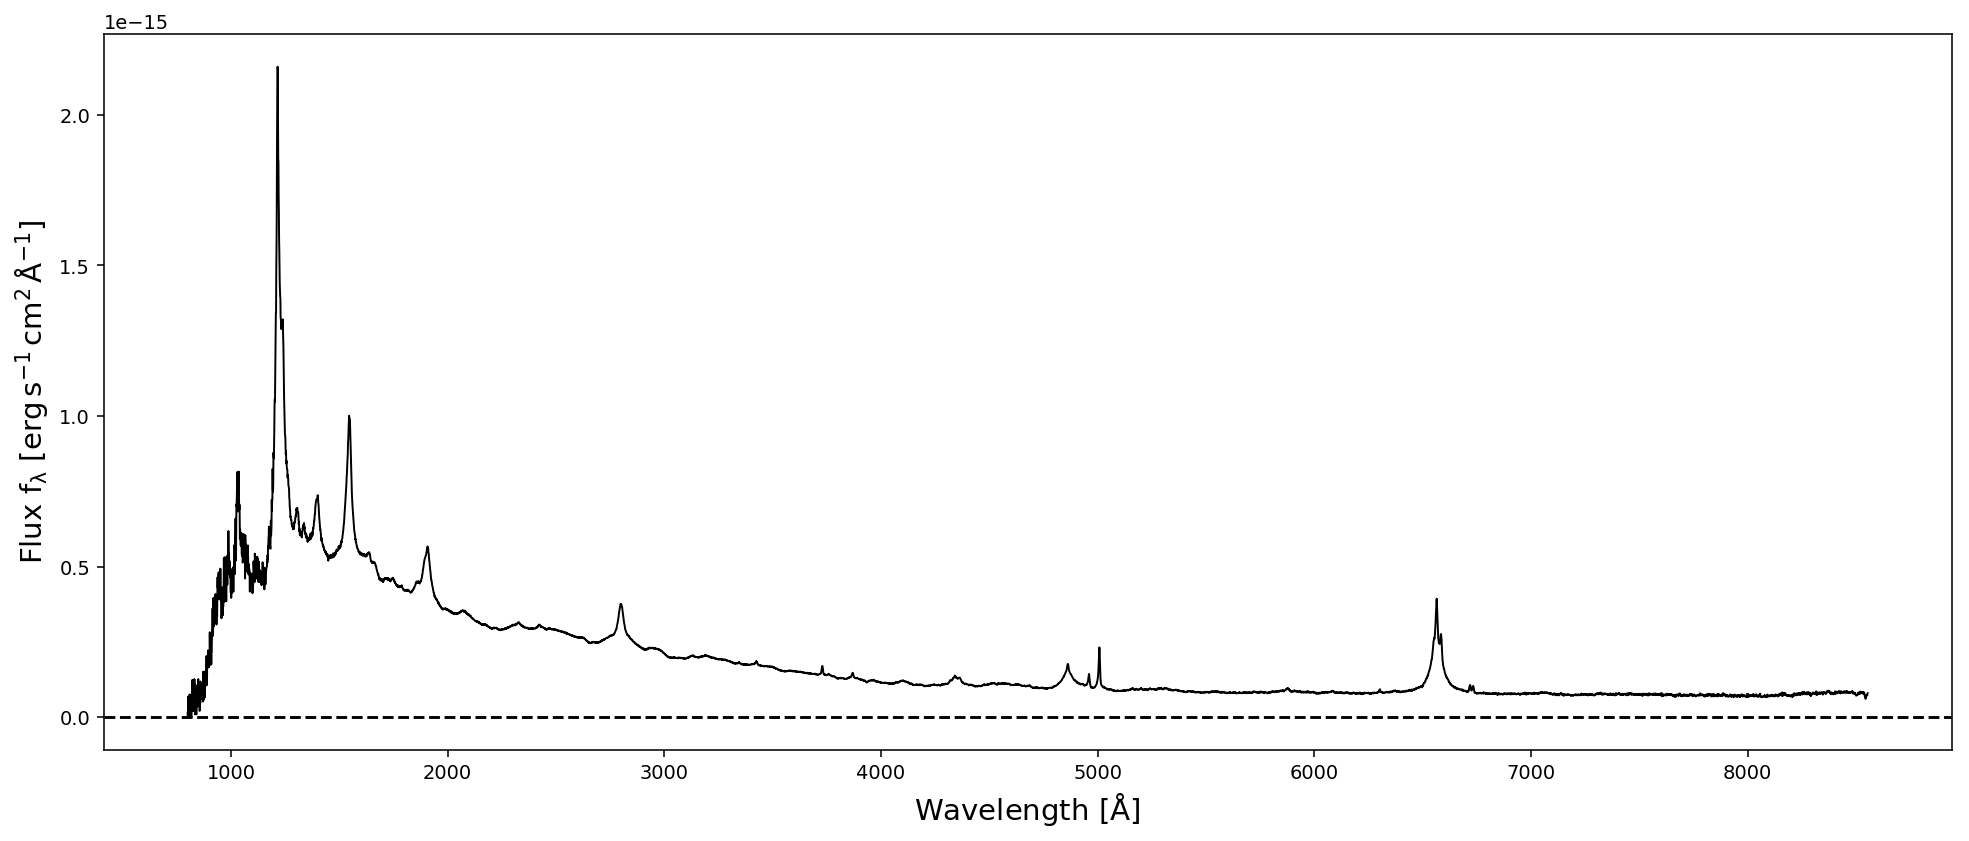

In [3]:
specA.plot()
specB.plot()

## 7 Adding, Subtracting, Multiplying and Dividing two spectra
### 7.1 Adding spectra [.add()]
As the example shows it is very straightforward to add two spectra. The resulting flux error (for all) is calculated using Gaussian error propagation.

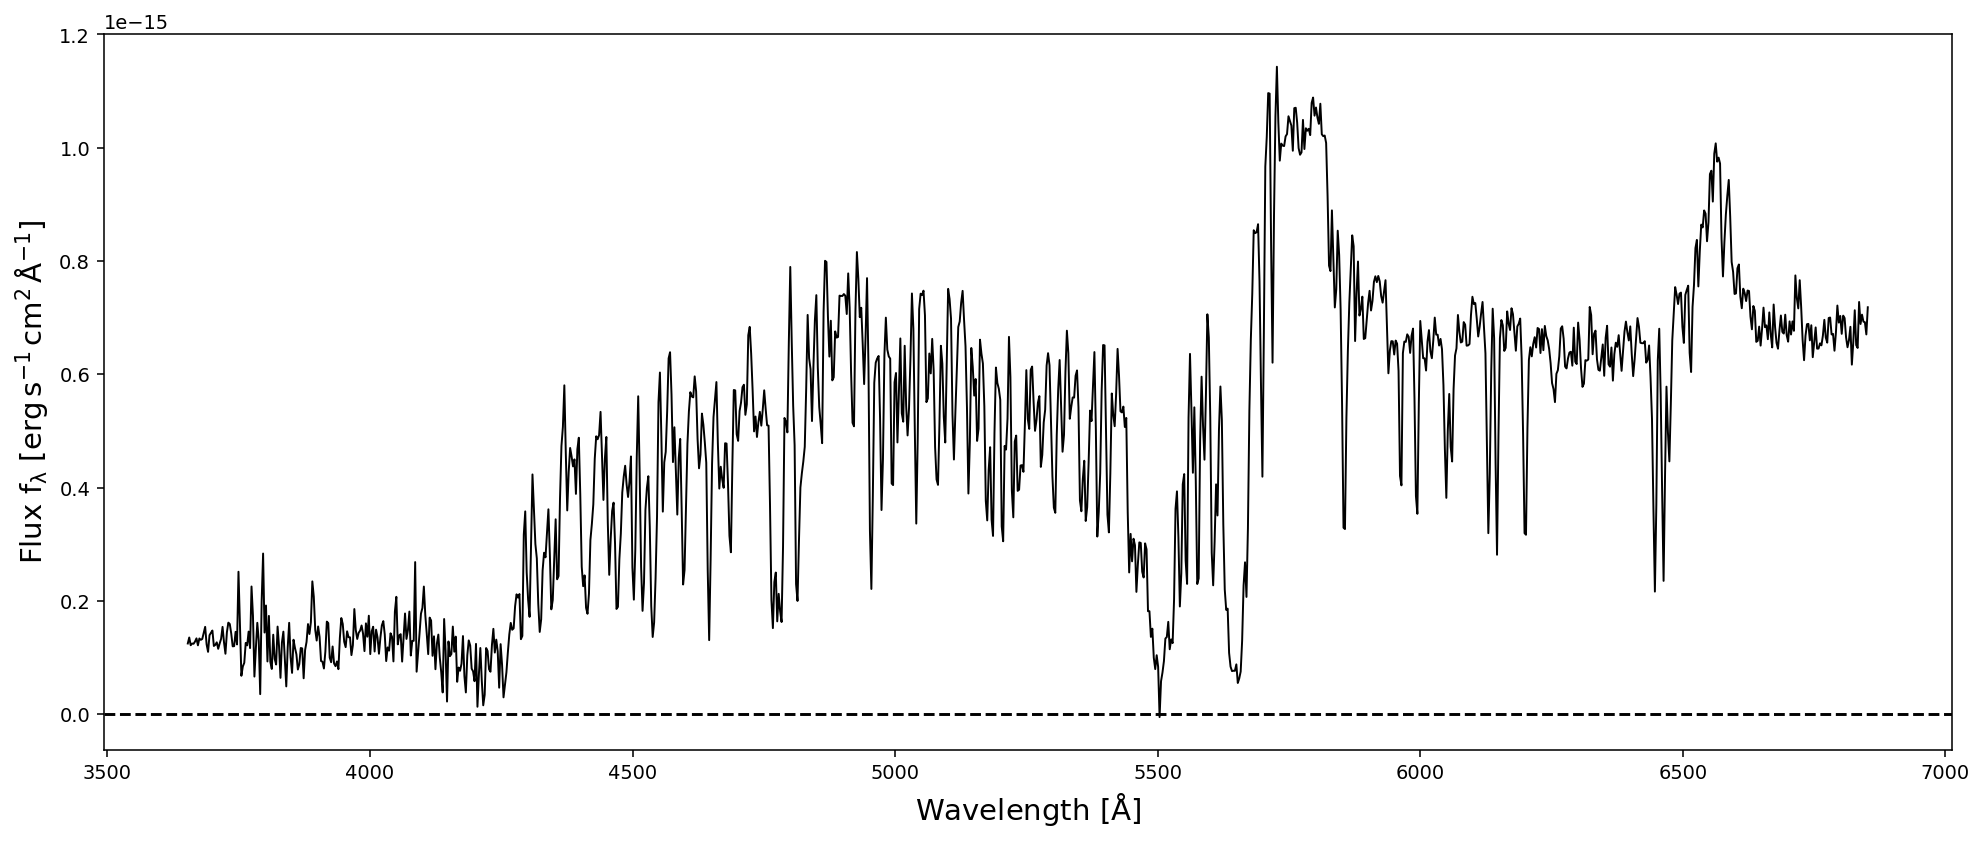

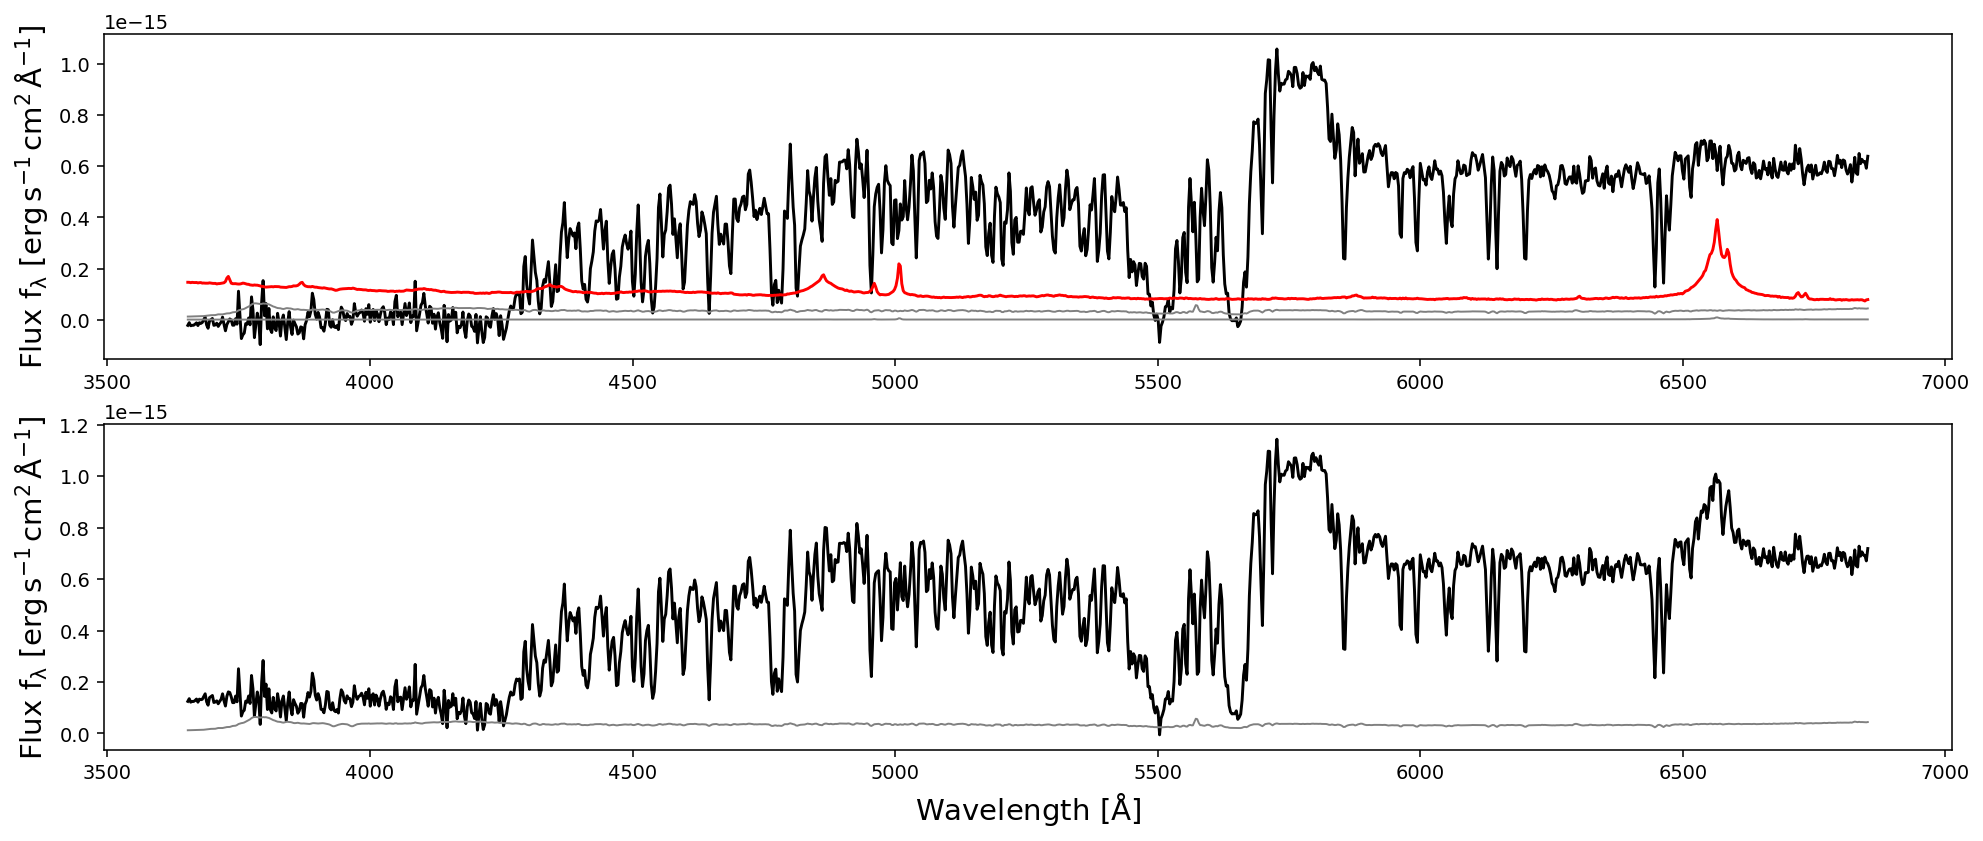

In [4]:
spec_res = specA.add(specB)
spec_res.plot()
sod.comparison_plot(specA,specB,spec_res)

### 7.2 Subtracting spectra [.subtract()]

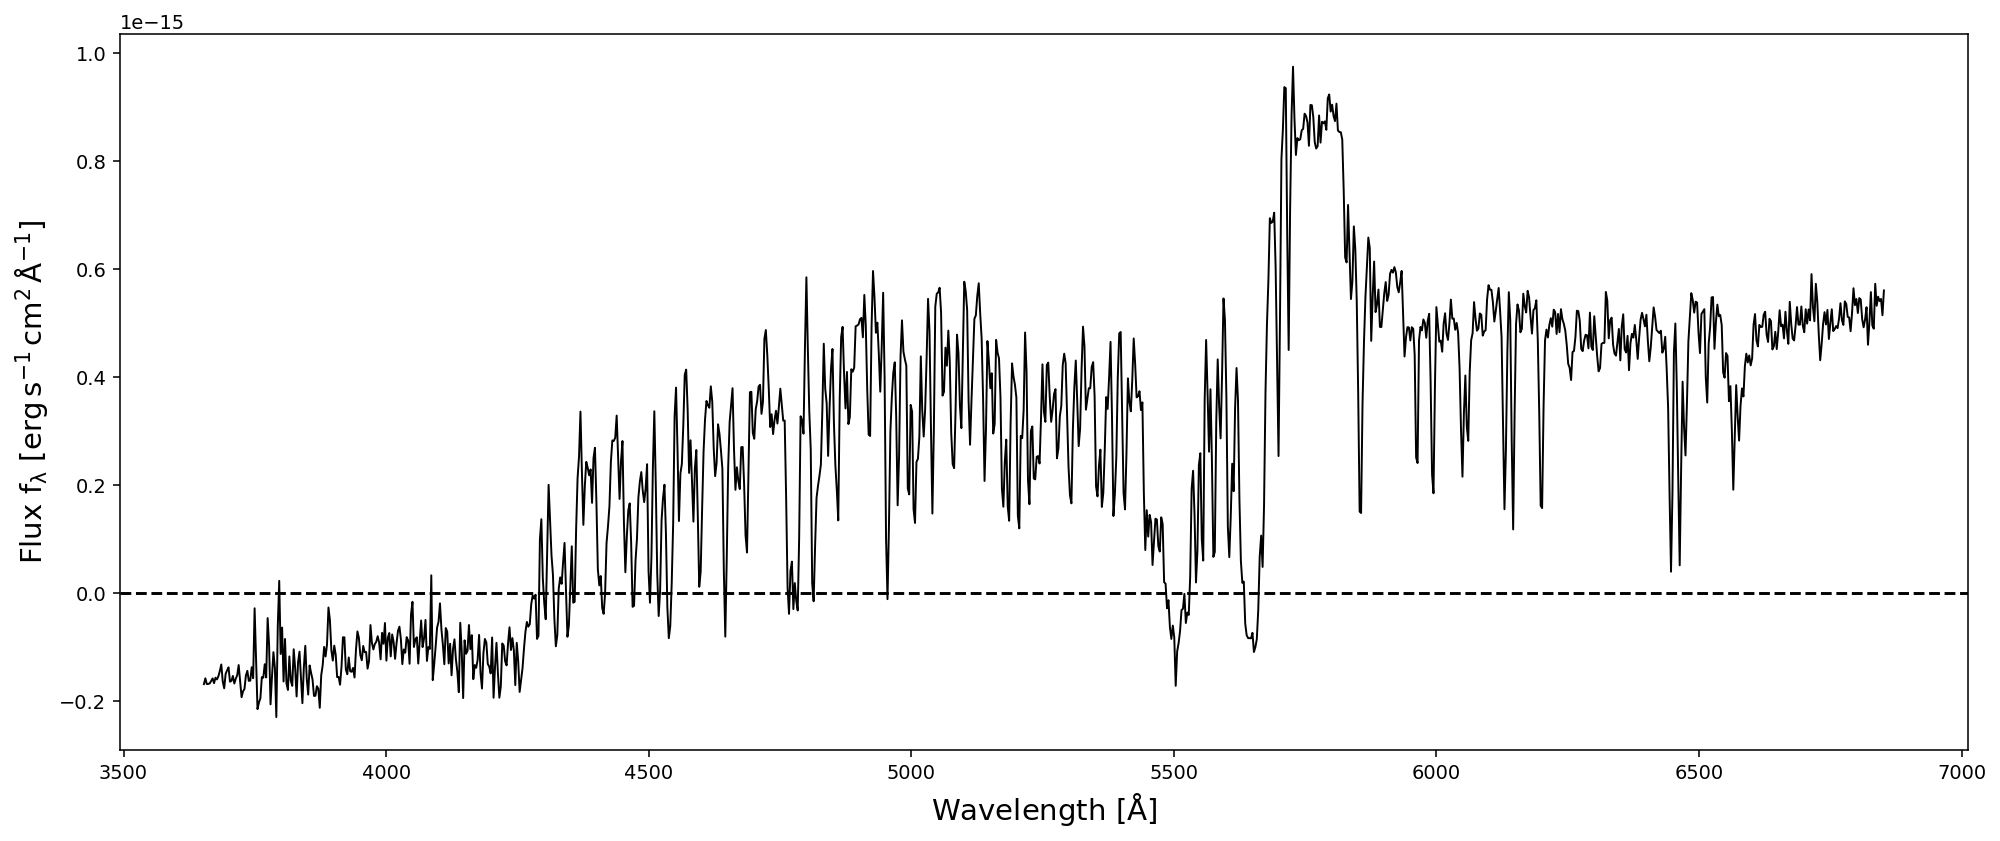

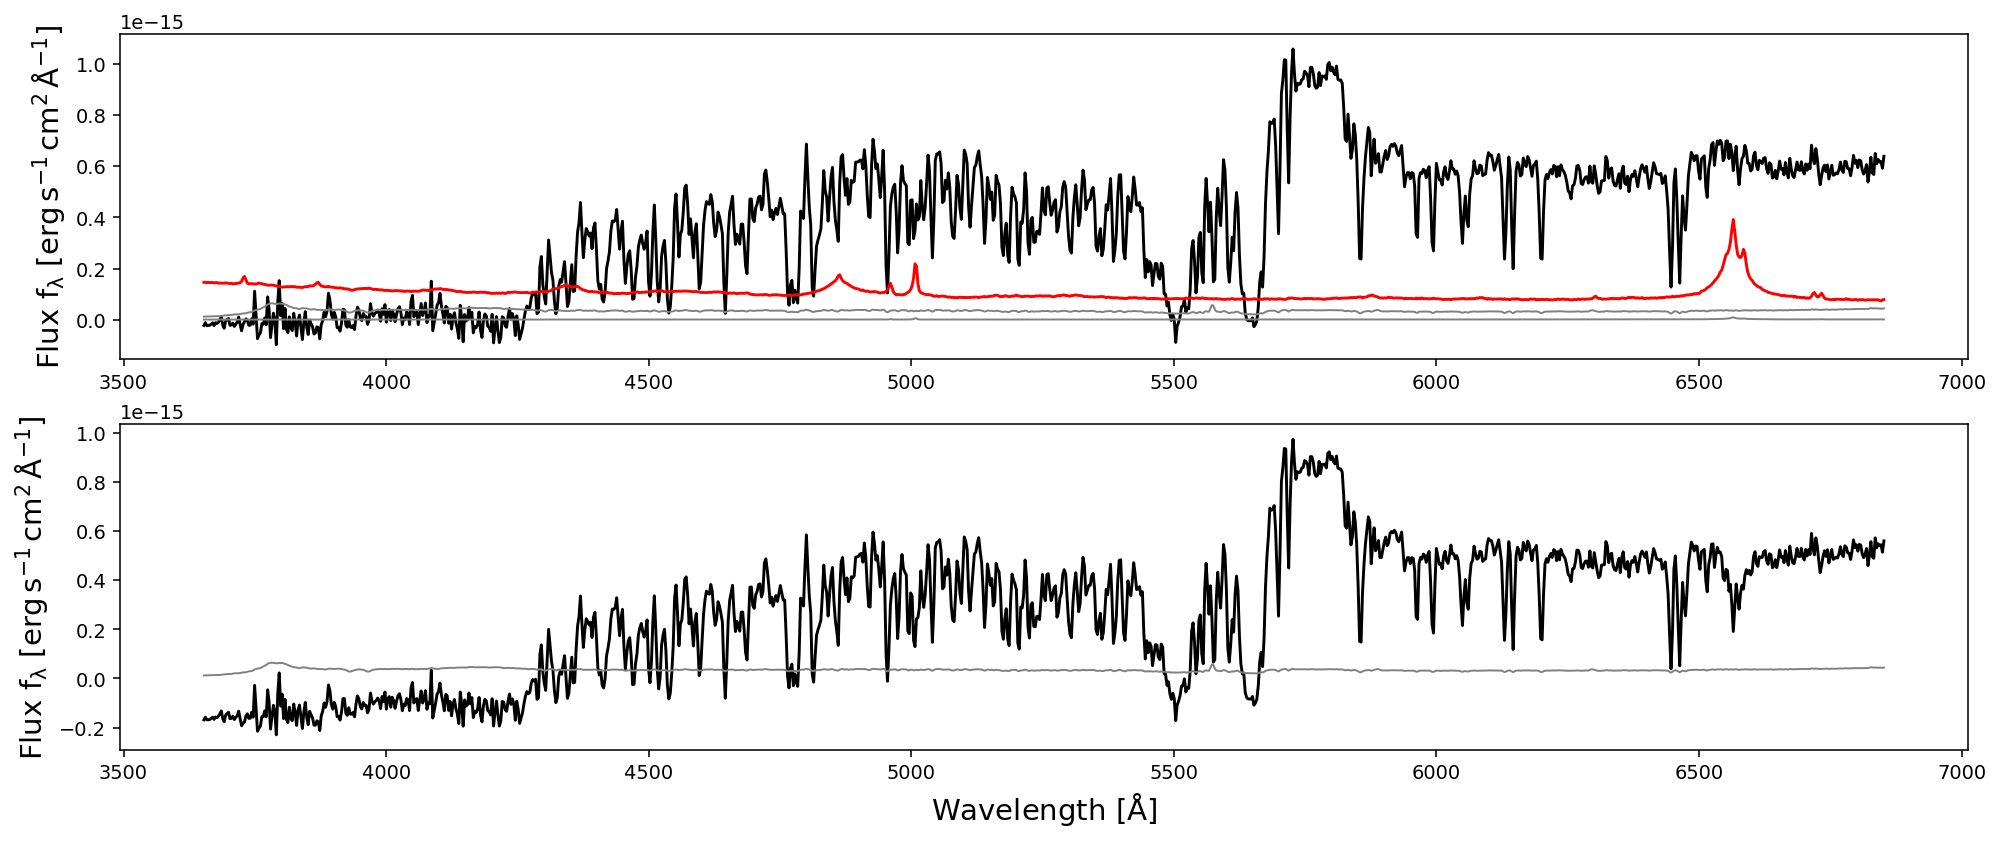

In [5]:
spec_res = specA.subtract(specB)
spec_res.plot()
sod.comparison_plot(specA,specB,spec_res)

### 7.3 Multplicating spectra [.multiply()]
Multiplication (or Division) of two spectra is always done on a pixel per pixel basis. 

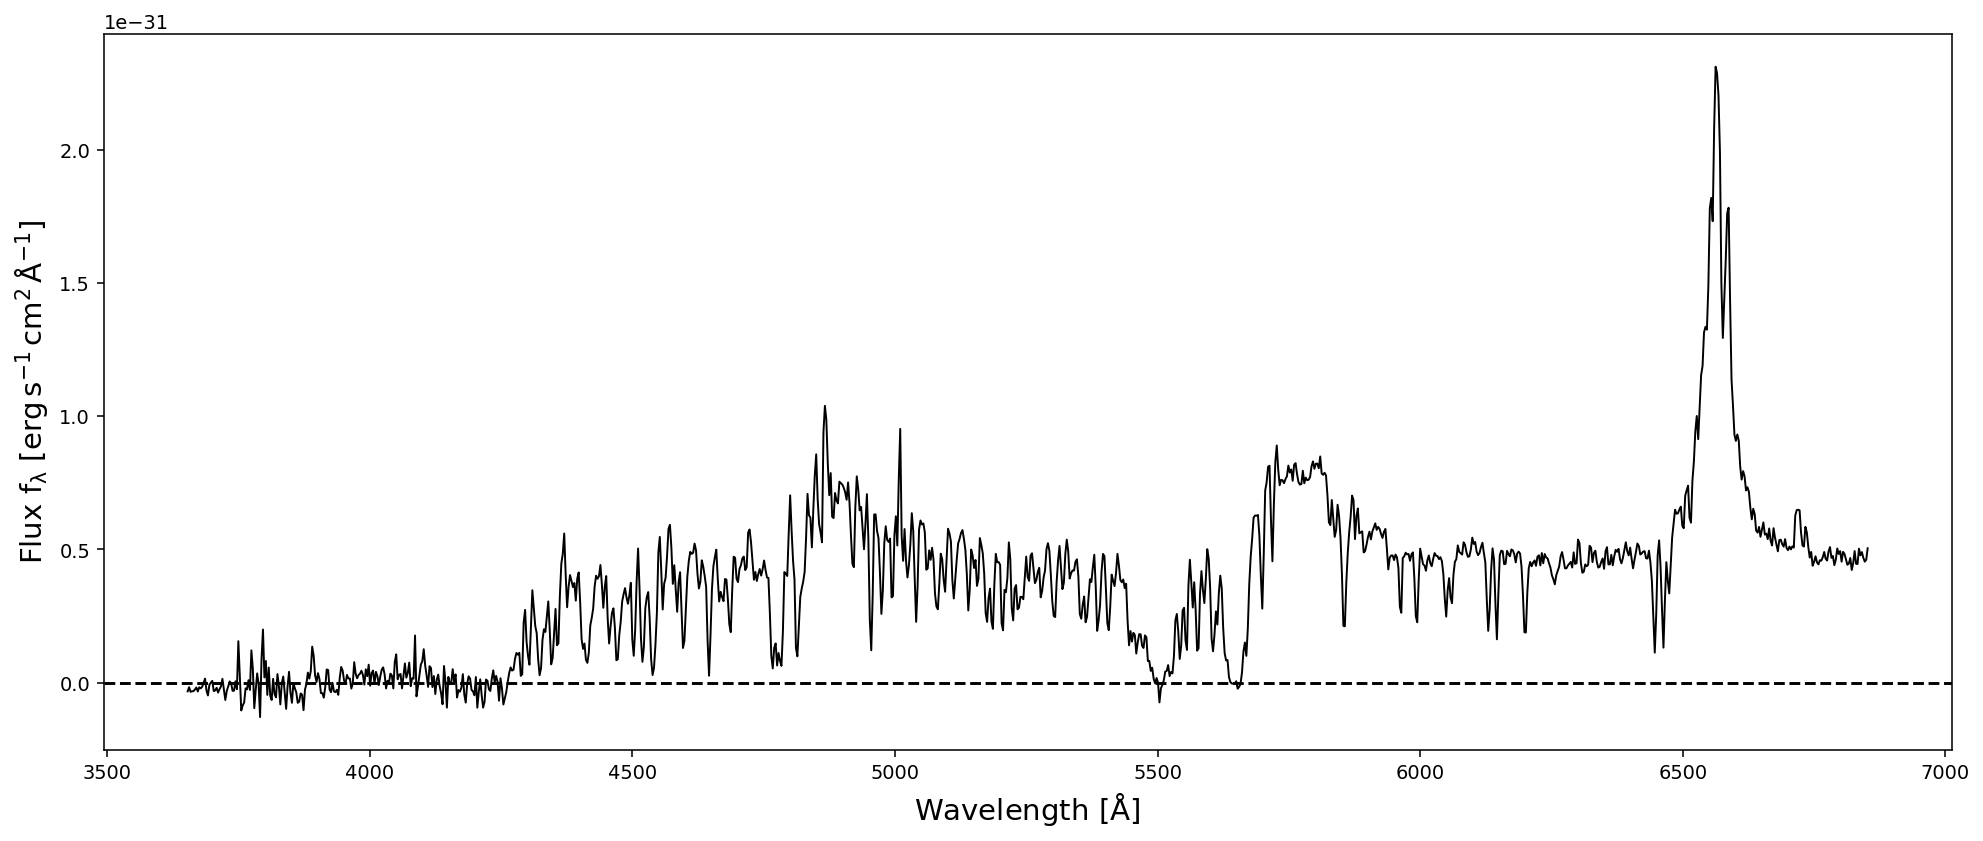

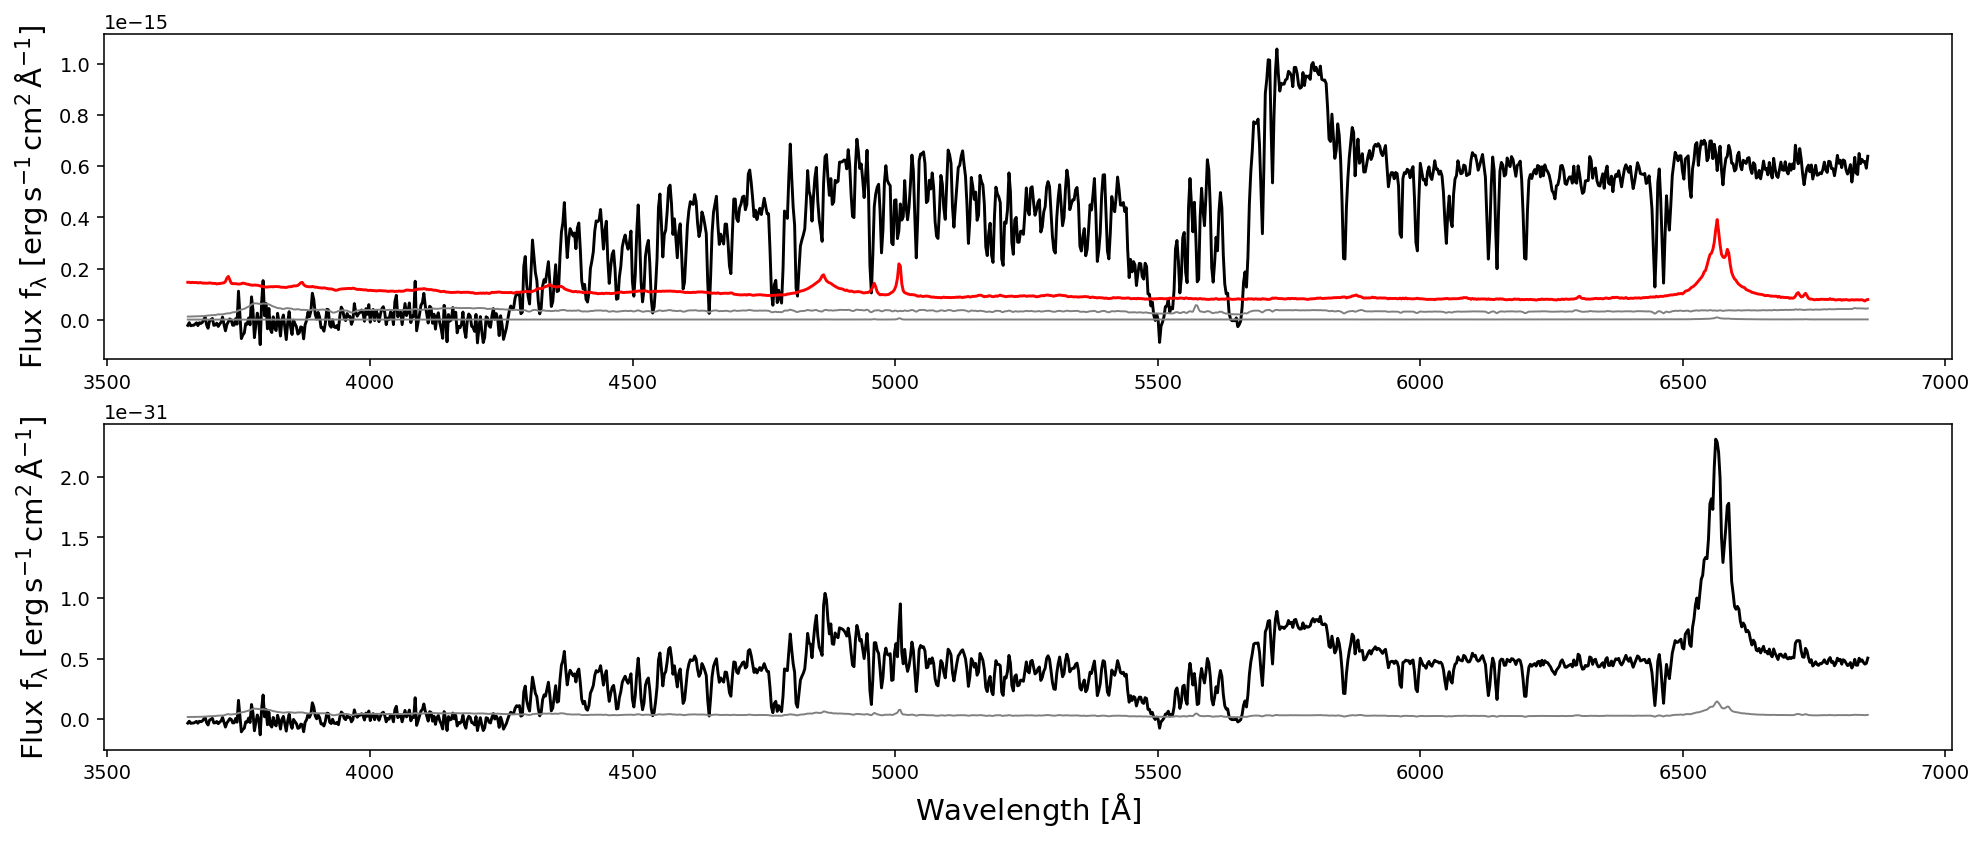

In [6]:
spec_res = specA.multiply(specB)
spec_res.plot()
sod.comparison_plot(specA,specB,spec_res)

### 7.4 Dividing spectra [.divide()]

(654,) (654,)


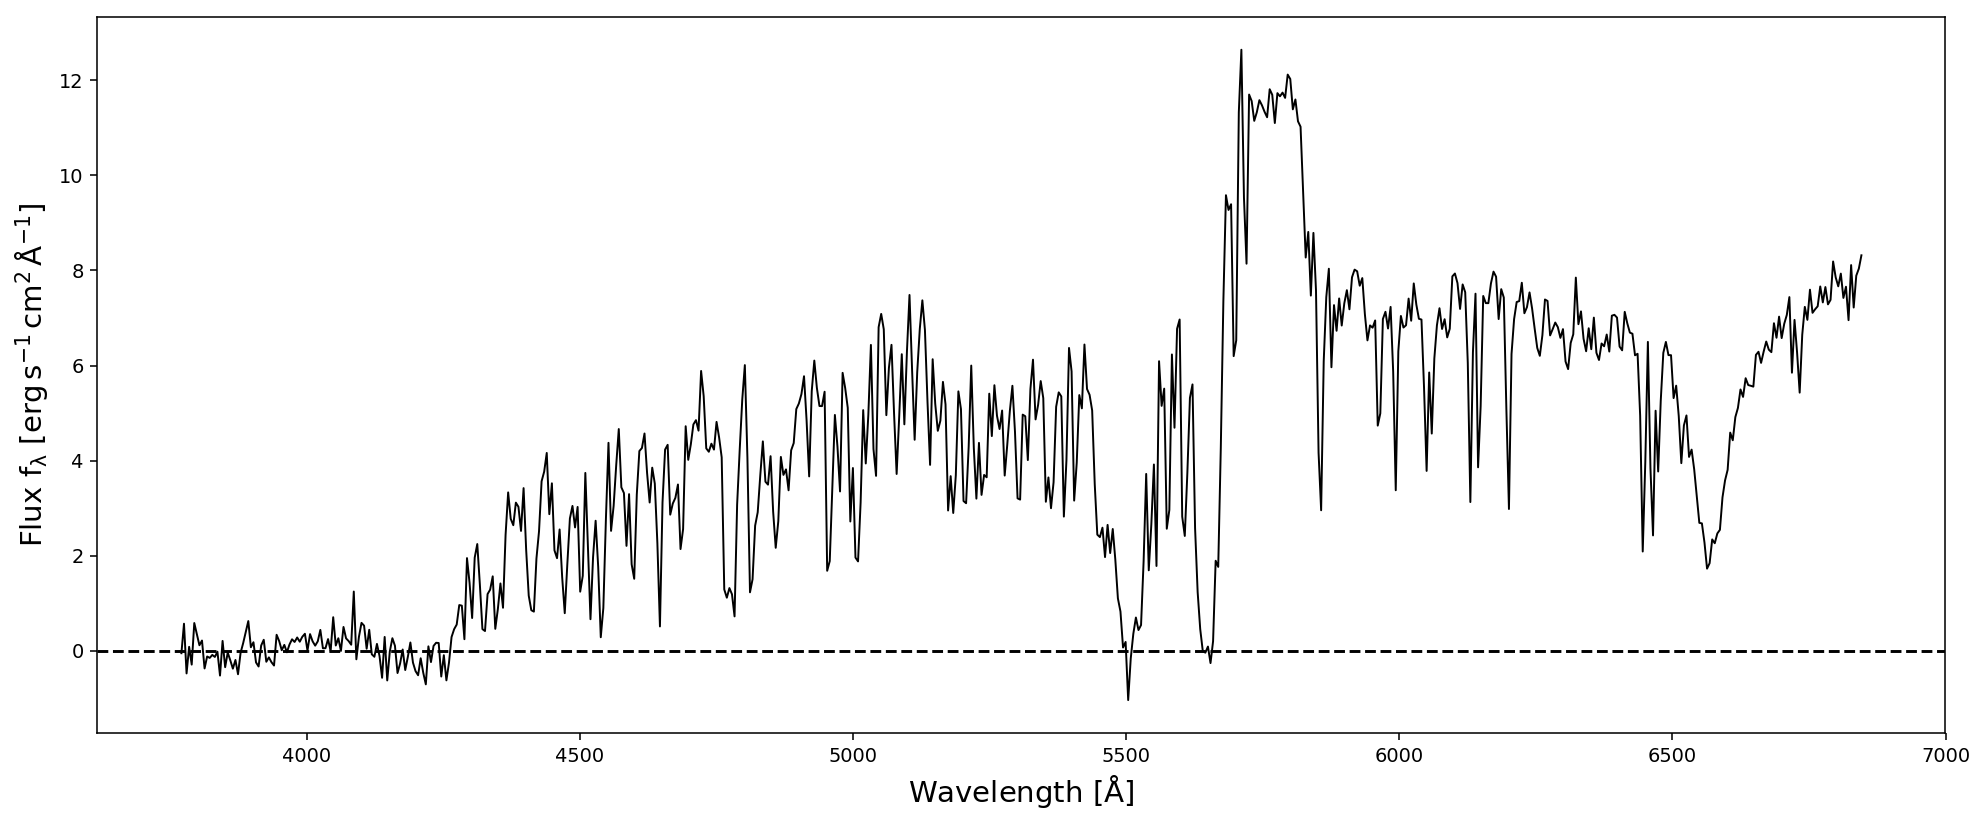

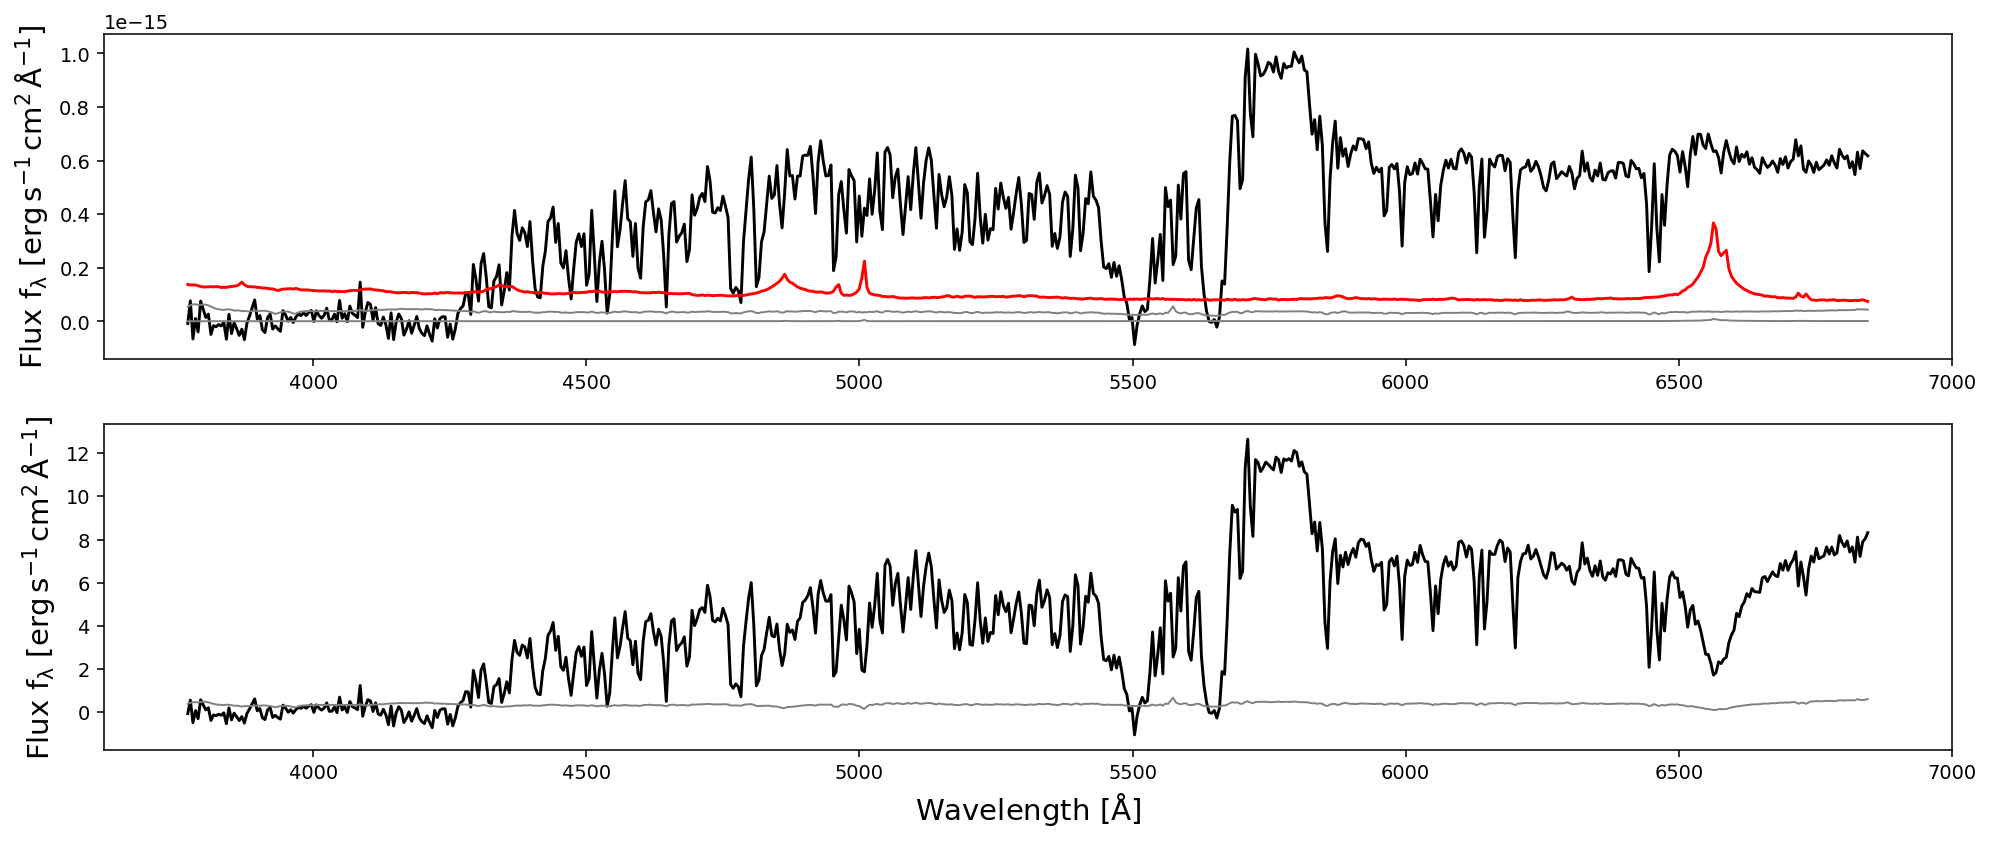

In [13]:
spec_res = specA.divide(specB)
spec_res.plot()
sod.comparison_plot(specA,specB,spec_res)

## 8 Comparing two QSO spectra
There are many use cases for the functions we have showcased in these tutorials. We will now demonstrate how to compare two spectra with another using the [.renormalize_by_spectrum()] function.

We need to reload the spectra A and B for this example, because the add/subtract/multiply/divide functions automatically match their dispersion axes, modifying the spectra themselves. Alternatively we could .restore() them.

We first redshift the vandenBerg2001 template to roughly match the redshift of the quasar spectrum. Then we match their dispersions and renormalize the template by the other spectrum. 

In [18]:
import matplotlib.pyplot as plt
specA.read_from_fits('data/J0341+1720.fits')
data = np.genfromtxt('data/vandenberk2001.dat')
specB = sod.SpecOneD(dispersion=data[:,0],flux=data[:,1]*1e-16, flux_err =data[:,2]*1e-16,unit='f_lam')
specB2 = specB.redshift(3.71)
specB2.match_dispersions(specA, force=True)
specB3 = specB2.renormalize_by_spectrum(specA)

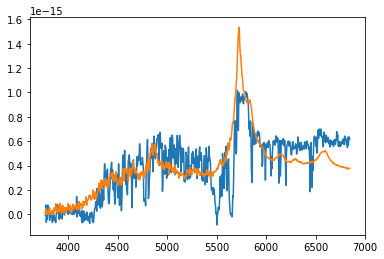

In [19]:
plt.plot(specA.dispersion, specA.flux)
plt.plot(specB3.dispersion, specB3.flux)